Atividades

In [8]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Atividade - Visualização de Dados**

Definição do escopo da visualização de dados

1. Problema: Falta de monitoramento e transparencia dos custos com parlamentares;

2. Objetivo: Desenvolver um dashboard de monitoramento de custos;

3. Fonte de dados: http://www.camara.leg.br/cotas/Ano-XXXX.csv.zip

4. Frequência: Atualização diária


In [13]:
inicio = 2020  #Ano inicial da base de dados
fim = 2021     #Ano final da base de dados

anos = [*range(inicio, fim, 1)]
consolidated_df = []

for ano in anos:
    df = pd.read_csv("http://www.camara.leg.br/cotas/Ano-"+ str(ano) +".csv.zip", sep=";")
    consolidated_df.append(df)

consolidated_df = pd.concat(consolidated_df)
consolidated_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,https://www.camara.leg.br/cota-parlamentar/not...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,https://www.camara.leg.br/cota-parlamentar/not...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,https://www.camara.leg.br/cota-parlamentar/not...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,https://www.camara.leg.br/cota-parlamentar/not...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,https://www.camara.leg.br/cota-parlamentar/not...


**Análise Exploratória de Dados**

In [14]:
consolidated_df.shape #Formato do dataframe (linhas, colunas)

(378846, 31)

In [15]:
consolidated_df.info() #Colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378846 entries, 0 to 212471
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          378846 non-null  object 
 1   cpf                        377596 non-null  float64
 2   ideCadastro                377596 non-null  float64
 3   nuCarteiraParlamentar      377596 non-null  float64
 4   nuLegislatura              378846 non-null  int64  
 5   sgUF                       377596 non-null  object 
 6   sgPartido                  377596 non-null  object 
 7   codLegislatura             378846 non-null  int64  
 8   numSubCota                 378846 non-null  int64  
 9   txtDescricao               378846 non-null  object 
 10  numEspecificacaoSubCota    378846 non-null  int64  
 11  txtDescricaoEspecificacao  94682 non-null   object 
 12  txtFornecedor              378828 non-null  object 
 13  txtCNPJCPF                 32

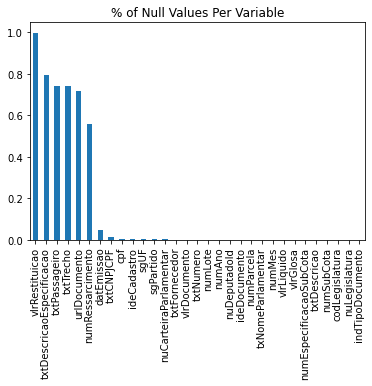

In [5]:
#check for null values


(
    consolidated_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
    / consolidated_df.shape[0]
).plot(kind="bar")

plt.title("% of Null Values Per Variable")

plt.show()


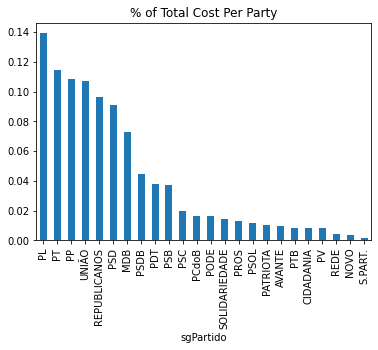

In [22]:
(
    consolidated_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    / consolidated_df["vlrDocumento"].sum()
).plot(kind="bar")

plt.title("% of Total Cost Per Party")

plt.show()